## 4. Generate a sample of 500 data points from a Poisson distribution with parameter 3. Plot a histogram of the data. Does it resemble a Poisson distribution? Explain.

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import numpy as np


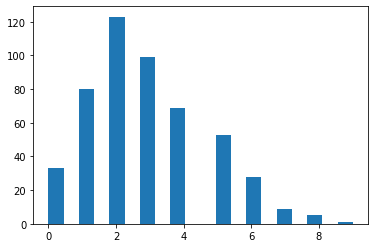

In [ ]:
#generate random values from Poisson distribution with mean=3 and sample size=500
psn = poisson.rvs(mu=3, size=500)
plt.hist(psn, bins=20)
plt.show()

###Explanation:
The histogram shows the distribution is right skewed and shows a peak value near 3 which is the mean parameter. The distribution as expected is not a normal distribution as expected for a poisson distribution.
Hence overall the histogram plot resembles Poisson distribution.

## 5. Generate a sample of 500 data points from a uniform distribution between 0 and 1. Plot a histogram of the data. Does it resemble a uniform distribution? Explain

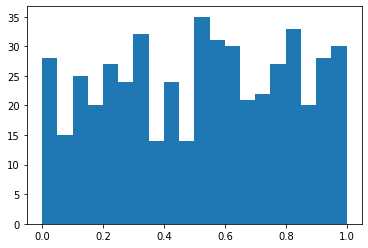

In [ ]:
unfm = np.random.uniform(0, 1, 500)
plt.hist(unfm, bins=20)
plt.show()


###Explanation
The histogram distribution is flat and approximately uniform across the range of given values. The number of data in each bin is roughly equal or spread uniformly and hence the shown distribution is approximately a uniform distribution.

## 7. Generate 200 samples of size 30 from a binomial distribution with parameters n=50 and p=0.4. For each sample, calculate the sample mean. Plot a histogram of the sample means. Does it resemble a normal distribution? Explain

In [ ]:
from scipy.stats import binom

##no of trials
n = 50
## probability of success
p = 0.4
sample_means = []

for i in range(200):
    sample = binom.rvs(n, p, size=30)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)


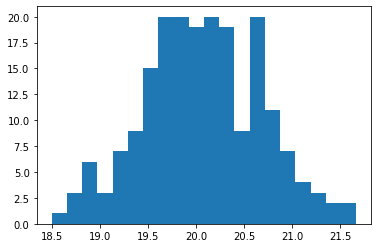

In [ ]:
# plot a histogram
plt.hist(sample_means, bins=20)
plt.show()

##Explanation -
The resulting histogram shows the distribution is roughly bell shaped and symmetric and continuous.
The peak is also near the expected population mean of (n*p) = (50 * 0.4) = 20.
As per the central limit theorem, the binomial distribution with 200 samples of size 30 does resemble a normal distribution.

## 8 Solve the following questions using the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy import stats
import statsmodels.stats.proportion as prop
import scipy.stats as stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/msda/1st sem/math/diagnosis.data', delimiter='\t|(?<!\d),(?!\d)', header=None, engine='python', encoding = 'utf-16')
df[0] = df[0].str.replace(',', '.').astype(float)
df.columns=['temperature', 'nausea',  'lumbar_pain', 'u_push', 'mic_pain', 'burn_itch_swell', 'dec_infl', 'dec_neph']

In [ ]:
df.head()

,temperature,nausea,lumbar_pain,u_push,mic_pain,burn_itch_swell,dec_infl,dec_neph
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [ ]:
df.shape

(120, 8)

## 8 a. Construct a 95% confidence interval for the mean temperature of patients in the dataset


In [ ]:
## confidence interval for a normal distribution can be calculated using the formula given
## 𝑪𝑰 = 𝒑𝒐𝒊𝒏𝒕 𝒆𝒔𝒕𝒊𝒎𝒂𝒕𝒆 ± 𝒎𝒂𝒓𝒈𝒊𝒏 𝒐𝒇 𝒆𝒓𝒓𝒐𝒓(𝒎𝒆)
## 𝒎𝒆 = 𝐜. 𝐯 ∗ 𝐒𝐄
## 𝐒𝐄 = 𝝈/√𝒏
## to simplify we can use stats library

n=len(df['temperature'])

## compute the mean and standard deviation of the temperature column
mean = df['temperature'].mean()
std_dev=df['temperature'].std()

## compute the standard error of the mean
std_err = std_dev / (n ** 0.5)

## compute the 95% confidence interval using the normal distribution
ci = stats.norm.interval(0.95, loc=mean, scale=std_err)

print("95% Confidence Interval for the mean temperature of patients: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

95% Confidence Interval for the mean temperature of patients: (38.40, 39.05)


## 8 b. Construct a 90% confidence interval for the proportion of patients who experience nausea. Based on this interval, is it reasonable to conclude that more than 55% of patients with inflammation of urinary bladder experience nausea

In [ ]:
## compute the proportion of the patients who experience nausea
nausea_df = df[df['nausea'] == 'yes']
prop_nausea = round(len(nausea_df)/len(df), 2)

##check n*p > 10
n=len(df)
p=prop_nausea
print('n :', n)
print('p :', p)
print('is n*p > 10? : ', n*p)

## compute confidence interval for the proportion using the formula
## 𝑪𝑰 = 𝒑𝒐𝒊𝒏𝒕 𝒆𝒔𝒕𝒊𝒎𝒂𝒕𝒆 ± 𝒎𝒂𝒓𝒈𝒊𝒏 𝒐𝒇 𝒆𝒓𝒓𝒐𝒓
## 𝒎𝒆 = 𝐜.𝐯 ∗ 𝐒𝐄
## SE = sqrt((proportion * (1-proportion))/n)

std_err = ((p*(1-p))/n) ** 0.5
me = 1.645 * std_err
ci_lower = p - me
ci_upper = p + me
print("90% Confidence Interval for the proportion of patients who experience nausea: ({:.2f}, {:.2f})".format(ci_lower, ci_upper))
# ci = prop.proportion_confint(len(nausea_df), n, alpha=0.1, method='normal')
# print(ci)

n : 120
p : 0.24
is n*p > 10? :  28.799999999999997
90% Confidence Interval for the proportion of patients who experience nausea: (0.18, 0.30)


##Based on this interval, is it reasonable to conclude that more than 55% of patients with inflammation of urinary bladder experience nausea?

#### The confidence interval tells us that we can be 90% confident that the true proportion of patients who experience nausea falls between 0.18 and 0.30. It does not tell us anything about the proportion of patients who experience nausea beyond these limits. To conclude that more than 55% of patients with inflammation of urinary bladder experience nausea, we would need to know the actual proportion of patients who experience nausea. If the actual proportion is greater than 0.55, then it would be reasonable to conclude that more than 55% of patients experience nausea. However, we do not have this information from the given confidence interval alone.


## 8 c. Conduct a hypothesis test to determine if the average temperature of patients in the dataset is significantly different from 37C

In [ ]:
## 1. define null hypothesis and alternate hypothesis
null_hypo="average_temp=37"
alternate_hypo="average_temp!=37"

# Test the hypothesis at a significance level of 0.05
alpha = 0.05

## 2. to find t_stat = (mean of temp of sample - 37)/SE
## SE = std_dev / sqrt(n)

se=df['temperature'].std() / (len(df['temperature']) ** 0.5)
t_stat =(df['temperature'].mean() - 37) / se
print("value of t_stat: ", t_stat)

## 3 Find p value of test_stat and compare with alpha
p_val = 0.00000 * 2

if p_val < alpha:
    print("p_val {} - rejecting null hypothesis".format(p_val))
else:
    print("p_val {} - failed to reject null hypothesis".format(p_val))

## confirm the hypothesis result using library
print("\n----------Testing using stats library-----------\n")
# Conduct a one-sample t-test to compare the mean temperature to 37°C
t_stat, p_value = stats.ttest_1samp(df['temperature'], 37)

# Print the test statistics and p-value
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_value))

if p_value < alpha:
    print("p-val : {:.3f}, alpha: {} - Rejecting null hypothesis as we have strong evidence, thus the average temperature of patients is significantly different from 37°C.".format(p_value, alpha))
else:
    print("p-val : {:.3f}, alpha: {} - Failed to reject null hypothesis as we don't have strong evidence, thus the average temperature of patients is not significantly different from 37°C.".format(p_value, alpha))

value of t_stat:  10.382586030765106
p_val 0.0 - rejecting null hypothesis

----------Testing using stats library-----------

t-statistic: 10.383
p-value: 0.000
p-val : 0.000, alpha: 0.05 - Rejecting null hypothesis as we have strong evidence, thus the average temperature of patients is significantly different from 37°C.


## 8 d. Conduct a hypothesis test to determine if there is a significant difference in the average temperature between patients with and without inflammation of urinary bladder.

In [ ]:
## This is a paired test as temperature is paired with inflmmation.
## we can use the formula as 𝑡∗ = 𝑥𝑑 / (𝑠𝑑/n)
## solving this using library as given in the notes

## 1 . defining null and alternate hypothesis
## h_null = "mean_temp_with_inflammation=mean_temp_without_inflammation"
## h_alt = "mean_temp_with_inflammation != mean_temp_without_inflammation"

## we can use library for two sample test as shown in the class notes
# Split the dataset into two groups based on the presence of inflammation of urinary bladder
with_infl = df[df['dec_infl'] == 'yes']['temperature']
without_infl = df[df['dec_infl'] == 'no']['temperature']

# Conduct a two-sample t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(with_infl, without_infl)

# Print the test statistics and p-value
print("t-statistic: {:.3f}".format(t_stat))
print("p-value: {:.3f}".format(p_value))

# Test the hypothesis at a significance level of 0.05
alpha = 0.05

if p_value < alpha:
    print("p-value : {:.3f}, alpha: {}- rejecting null hypothesis as we have strong evidence. There is a significant difference in the average temperature between patients with and without inflammation of urinary bladder.".format(p_value, alpha))
else:
    print("p-value : {:.3f}, alpha: {} - failed to reject null hypothesis as we don't have strong evidence. There is not a significant difference in the average temperature between patients with and without inflammation of urinary bladder.".format(p_value, alpha))

t-statistic: -2.647
p-value: 0.009
p-value : 0.009, alpha: 0.05- rejecting null hypothesis as we have strong evidence. There is a significant difference in the average temperature between patients with and without inflammation of urinary bladder.


## 8 e. Conduct a hypothesis test to determine if the proportion of patients with micturition pains is significantly higher than the proportion with urine pushing

In [ ]:
## Conduct hypothesis by comparing two proportions.

## 1. Defining null and alternate hypothesis

## h_null = "p_m = p_u"
## h_alt = "pm > p_u"

m = df[df['mic_pain'] == 'yes']
u = df[df['u_push'] == 'yes']

## proportion of patients with micturition pains and urine pushing
p_m_hat = round(len(m)/len(df), 2)
p_u_hat = round(len(u)/len(df), 2)

print(p_u_hat, p_m_hat)

## 2. test static can be performed using the formula, z = (p_m-hat - p_u-hat) / sqrt(p-hat(1-p-hat)*(1/nm + 1/nu))
## where p-hat = (xm + xu) / (nm + nu)
## where xm and xu is patients with micturition pains and urine pushing, respectively
## and  nm, nu are sample sizes

xm = len(m)
xu = len(u)
nm = nu = len(df)

print(xm, xu, nm, nu)

p_hat = round((xm + xu) / (nm + nu),2)

print(p_hat * (1-p_hat))

# print((p_hat(1-p_hat)))
z = (p_m_hat-p_u_hat) / ((p_hat * (1-p_hat)*(1/nm + 1/nu)) ** 0.5)

p_value = stats.norm.cdf(z)
print(p_value)

alpha= 0.05

print(z)
##comparing p value with alpha
if p_value < alpha:
    print("p-value : {:.3f}, alpha: {}- rejecting null hypothesis as we have strong evidence. The proportion of patients with micturition pains is significantly higher than the proportion with urine pushing".format(p_value, alpha))
else:
    print("p-value : {:.3f}, alpha: {}- failed to reject null hypothesis as we don't have strong evidence. The proportion of patients with micturition pains is not significantly higher than the proportion with urine pushing".format(p_value, alpha))


0.67 0.49
59 80 120 120
0.2436
0.002364461029954593
-2.8249416925845505
p-value : 0.002, alpha: 0.05- rejecting null hypothesis as we have strong evidence. The proportion of patients with micturition pains is significantly higher than the proportion with urine pushing
